In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
from __future__ import division
import sklearn.linear_model as lm
from sklearn import tree

%matplotlib inline

#read in csv files
classA = pd.read_csv('classA.csv', header=0)
probeA = pd.read_csv('probeA.csv', header=0)
probeB = pd.read_csv('probeB.csv', header=0)

#create single dataset with class labels and training flags
#append class label and random assignment of training flags
trainData = np.append(probeA,classA,axis=1)
trainFlag = np.random.choice([0,1], size=(1000,1), p=[1./3,2./3])
trainData = np.append(trainData,trainFlag,axis=1)

#save as new csv file
np.savetxt("trainData.csv", trainData, delimiter=",")
trainData = pd.read_csv('trainData.csv', header=None, \
                        names=['TNA', 'c1', 'c2', 'c3', 'm1', 'm2', 'm3', 'n1', 'n2', 'n3', 'p1', 'p2', 'p3', \
                               'class', 'train'])

#list of headers
headers_to_scale = ['TNA', 'c1', 'c2', 'c3', 'm1', 'm2', 'm3', 'n1', 'n2', 'n3', 'p1', 'p2', 'p3','class','train']
probe_B_headers = ['c1', 'c2', 'c3', 'm1', 'm2', 'm3', 'n1', 'n2', 'n3', 'p1', 'p2', 'p3']
#trainData

In [2]:
#create training data set and standardise - preprocessing function
#x is input csv, headers = list of headers, tlabel = target (class in our case)
#isTrain = flag for training dataset
def scaleData(dataFrame, headers):
    df = dataFrame.copy()
    dm = df.as_matrix()
    
    column = 0
    #means and stds for all columns (apart from class and training flag)
    for header in headers:
        if header != 'class' and header != 'train':
            mean = df[header].mean()
            std = df[header].std()
            for row in range(0,len(dm)):
                dm[row][column] = (dm[row][column]-mean)/std
            column += 1
            
    
    #suppress scientific form
    np.set_printoptions(suppress=True)
    #save new data as csv
    np.savetxt("scaledData.csv", dm, delimiter=",")
    #read in new csv with scaled data
    scaledData = pd.read_csv('scaledData.csv', header=None, \
                             names=headers)
    return scaledData

scaled_dataFrame = scaleData(trainData, headers_to_scale)

In [3]:
#create new dataframe without TNA values
small_df_2 = scaled_dataFrame[['c3','p2','train']]
#create separate dataframe with TNA values only to use as label
small_TNA = scaled_dataFrame[['TNA','train']]

In [4]:
#split up dataframe into training and testing sets
train_data_2 = small_df_2[small_df_2['train']==1].copy()
train_data_2 = train_data_2.drop('train',axis=1)

test_data_2 = small_df_2[small_df_2['train']==0].copy()
test_data_2 = test_data_2.drop('train',axis=1)

train_TNA_label = small_TNA[small_TNA['train']==1].copy()
train_TNA_label = train_TNA_label.drop('train',axis=1)

test_TNA_label = small_TNA[small_TNA['train']==0].copy()
test_TNA_label = test_TNA_label.drop('train',axis=1)

In [5]:
#fit a new DT to TNA separated dataframe
reg = tree.DecisionTreeRegressor()
reg = reg.fit(train_data_2, train_TNA_label)

In [6]:
#predict the values of TNA
predict = reg.predict(test_data_2)

In [7]:
#add predictions alongside true TNA values
test_TNA_label['predict'] = predict

In [8]:
test_TNA_label

,TNA,predict
3,0.452012,1.331738
5,0.312662,0.440890
11,-1.394275,-0.187940
18,0.795283,1.777502
19,1.919215,2.096103
24,0.702642,0.876252
27,0.843581,0.413716
30,-2.288100,0.070665
33,0.815947,-0.080568
34,-0.313220,-0.079957


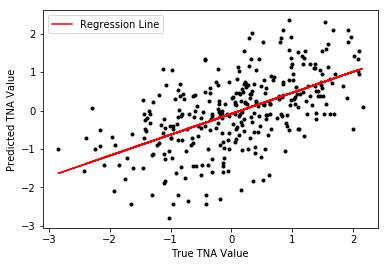

In [9]:
#plot test TNA label against predicted TNA
x = test_TNA_label['TNA']
y = test_TNA_label['predict']

m, c = np.polyfit(test_TNA_label['TNA'],test_TNA_label['predict'],1)
plt.plot(x,y, 'k.',label="")
plt.plot(x,m*x+c,'r-',label='Regression Line')
plt.xlabel('True TNA Value')
plt.ylabel('Predicted TNA Value')
plt.legend(loc="upper left")

In [10]:
#scale probe B data
scaledB = scaleData(probeB,probe_B_headers)
#note the scaling factors for TNA for probe A
TNA_mean = probeA['TNA'].mean()
TNA_std = probeA['TNA'].std()
#restrict data to useful attributes for testing
small_B = scaledB[['c3','p2']]

In [11]:
#predict TNA values for B
probeB_predict = reg.predict(small_B)

In [12]:
new_TNA_B = pd.DataFrame(probeB_predict,columns=['Predicted TNA'])
predict_TNA = new_TNA_B.copy()
tna_matrix = predict_TNA.as_matrix()
for TNA in range(len(tna_matrix)):
    tna_matrix[TNA][0] = (tna_matrix[TNA][0]+TNA_mean)*TNA_std
np.savetxt("tnaB.csv",tna_matrix,delimiter=",")